In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv" ,names = ["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"],header = None)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.skew()

Id               0.000000
RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass    1.114915
dtype: float64

In [7]:
for i in df.columns:
    print(df[i].value_counts)
    print('\n')

<bound method IndexOpsMixin.value_counts of 0        1
1        2
2        3
3        4
4        5
      ... 
209    210
210    211
211    212
212    213
213    214
Name: Id, Length: 214, dtype: int64>


<bound method IndexOpsMixin.value_counts of 0      1.52101
1      1.51761
2      1.51618
3      1.51766
4      1.51742
        ...   
209    1.51623
210    1.51685
211    1.52065
212    1.51651
213    1.51711
Name: RI, Length: 214, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0      13.64
1      13.89
2      13.53
3      13.21
4      13.27
       ...  
209    14.14
210    14.92
211    14.36
212    14.38
213    14.23
Name: Na, Length: 214, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0      4.49
1      3.60
2      3.55
3      3.69
4      3.62
       ... 
209    0.00
210    0.00
211    0.00
212    0.00
213    0.00
Name: Mg, Length: 214, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0      1.10
1      1.36
2      1.54
3      1.29
4      1.

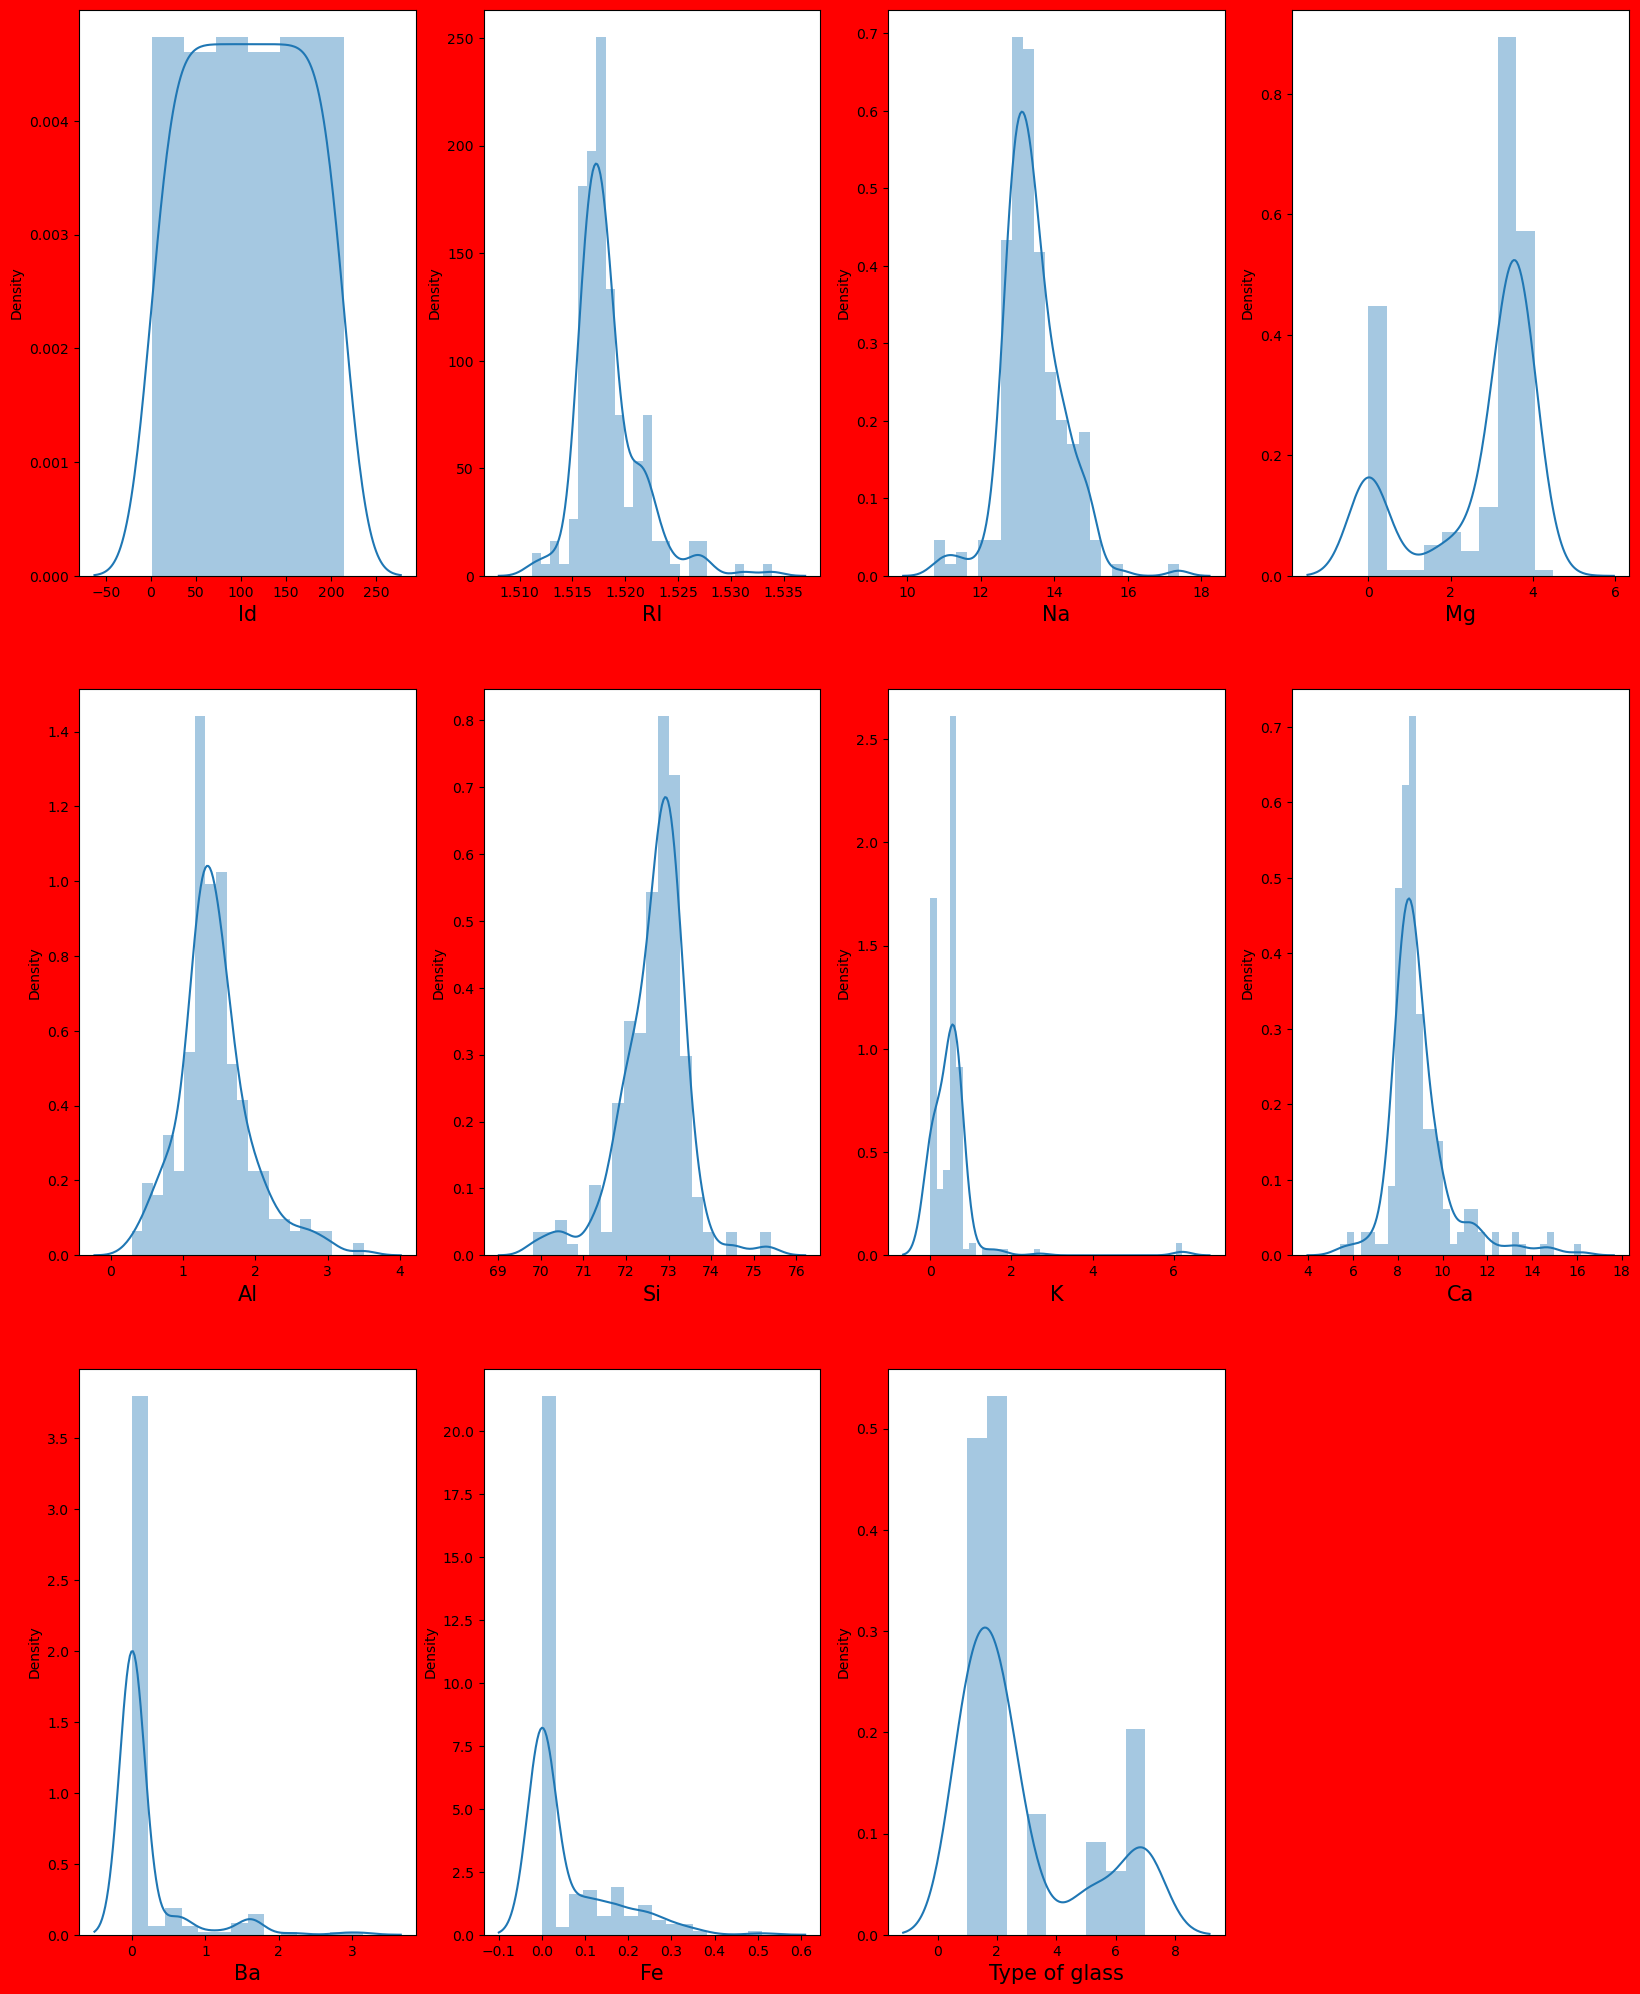

In [8]:
plt.figure(figsize = (20,25), facecolor = "red")
plot_number = 1

for column in df:
    if plot_number<=11:
        ax = plt.subplot(3,4,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 15)
    
    plot_number +=1
plt.show()

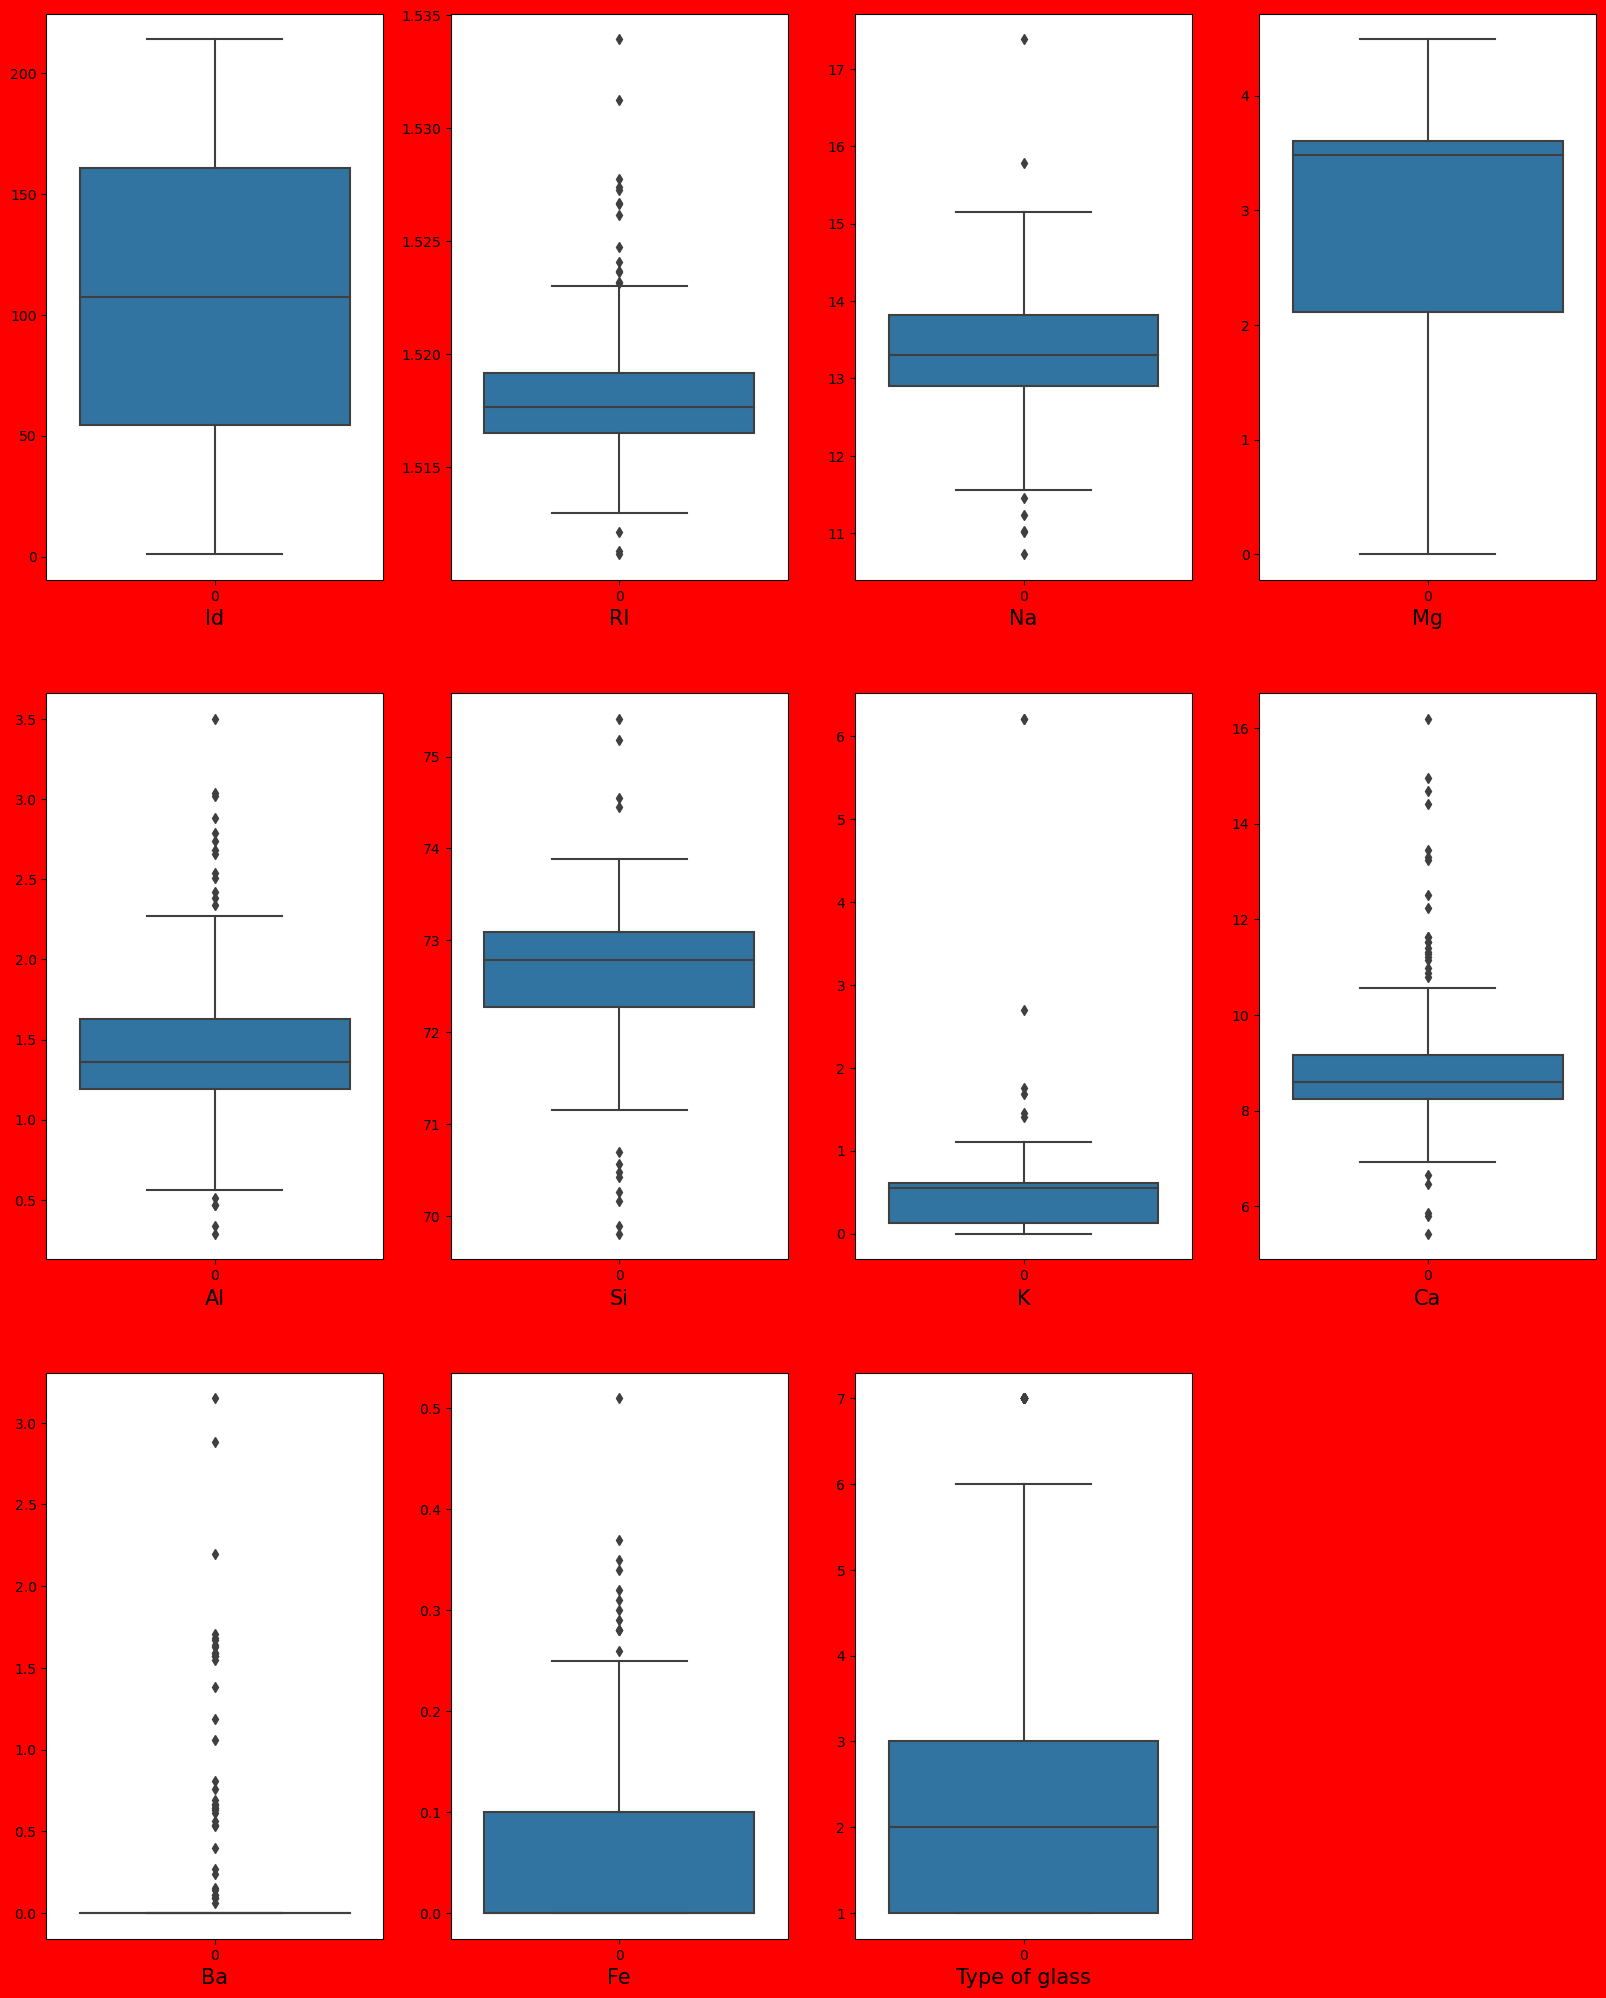

In [9]:
plt.figure(figsize = (20,25), facecolor = "red")
plot_number = 1

for column in df:
    if plot_number<=11:
        ax = plt.subplot(3,4,plot_number)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 15)
    
    plot_number +=1
plt.show()

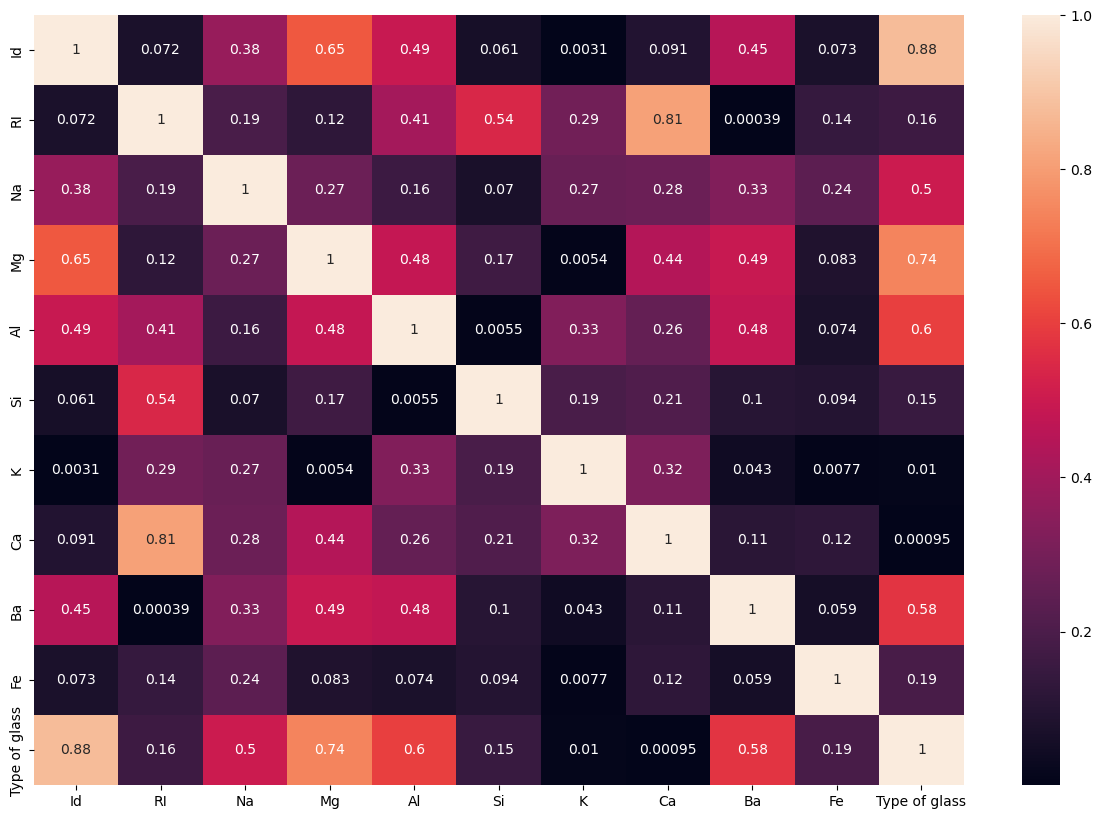

In [10]:
#Use heatmap to check correlation

df_corr = df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot = True,annot_kws={"size" : 10 })
plt.show()

In [11]:
#Check z_score values to reduce skewness and convert the data in more efficient manner

from scipy.stats import zscore
z_score = zscore(df[["K","Ba","Fe"]])
abs_z_score = np.abs(z_score)
filtering = (abs_z_score <3).all(axis = 1)
df = df[filtering]

df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,103.400990,1.518338,13.403317,2.776832,1.410099,72.699851,0.424059,8.986634,0.118465,0.052921,2.638614
std,60.922858,0.002890,0.777706,1.387455,0.453805,0.665819,0.286263,1.387931,0.350776,0.087933,2.030390
min,1.000000,1.511150,11.020000,0.000000,0.290000,70.160000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,51.250000,1.516528,12.930000,2.485000,1.182500,72.332500,0.120000,8.247500,0.000000,0.000000,1.000000
50%,101.500000,1.517680,13.300000,3.485000,1.360000,72.810000,0.550000,8.600000,0.000000,0.000000,2.000000
75%,153.750000,1.519140,13.787500,3.607500,1.602500,73.087500,0.600000,9.217500,0.000000,0.097500,3.000000
max,213.000000,1.533930,17.380000,4.490000,2.880000,75.410000,1.760000,16.190000,1.640000,0.340000,7.000000


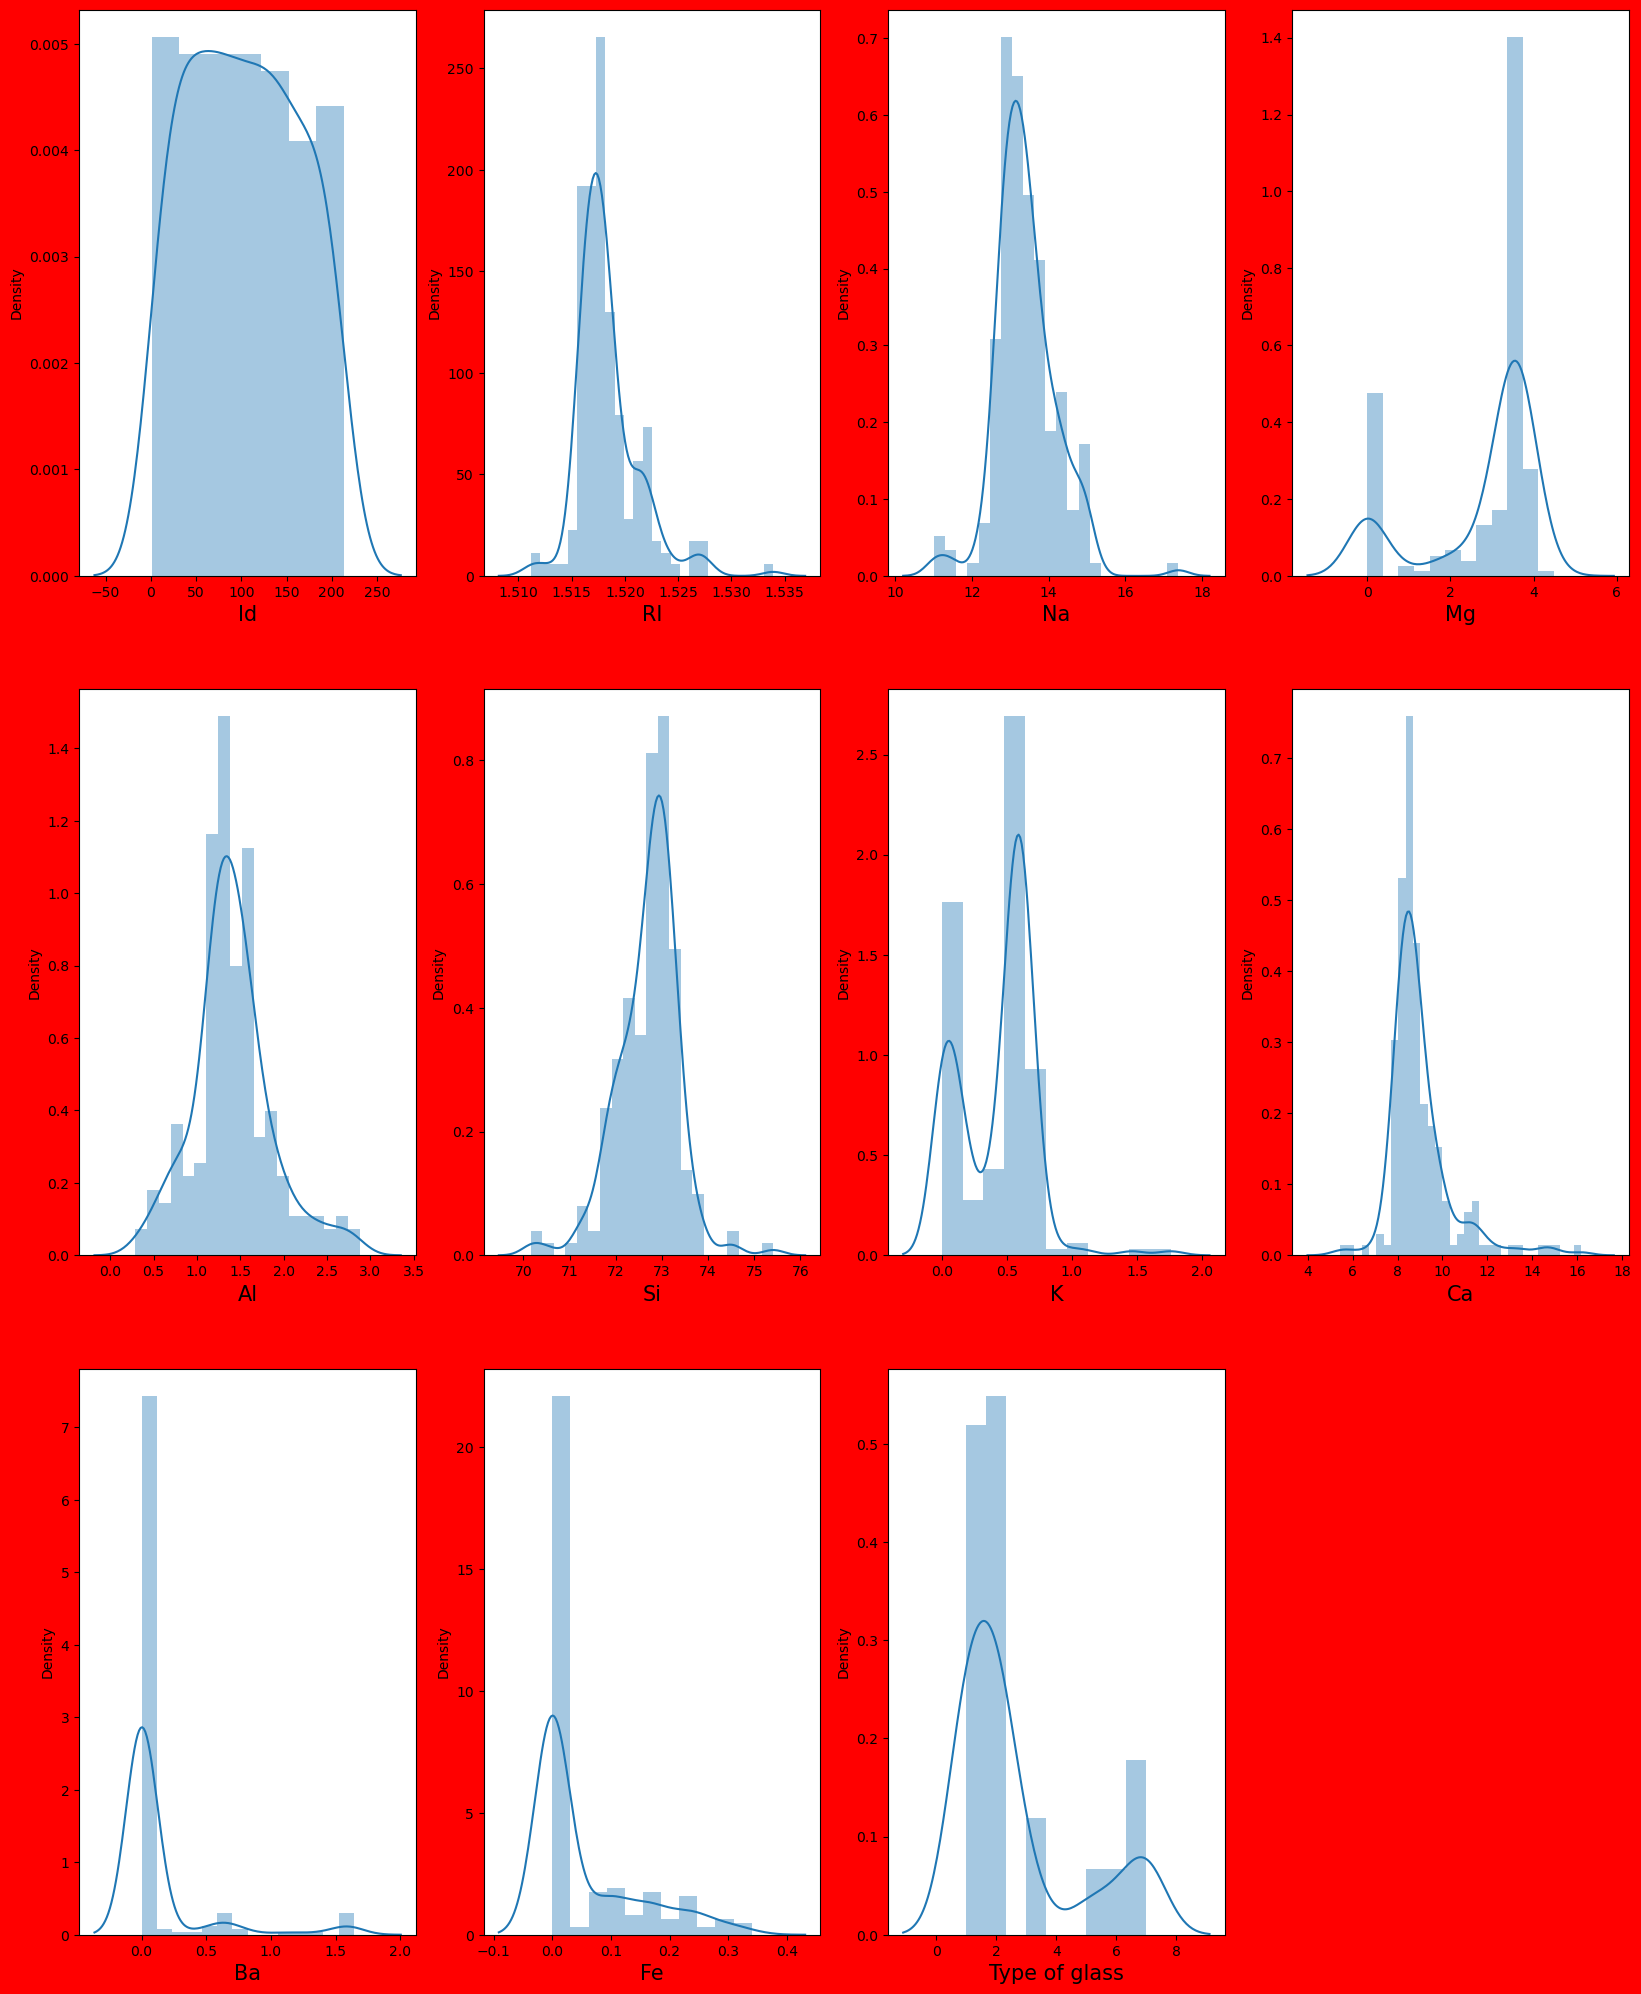

In [12]:
plt.figure(figsize = (20,25), facecolor = "red")
plot_number = 1

for column in df:
    if plot_number<=11:
        ax = plt.subplot(3,4,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 15)
    
    plot_number +=1
plt.show()

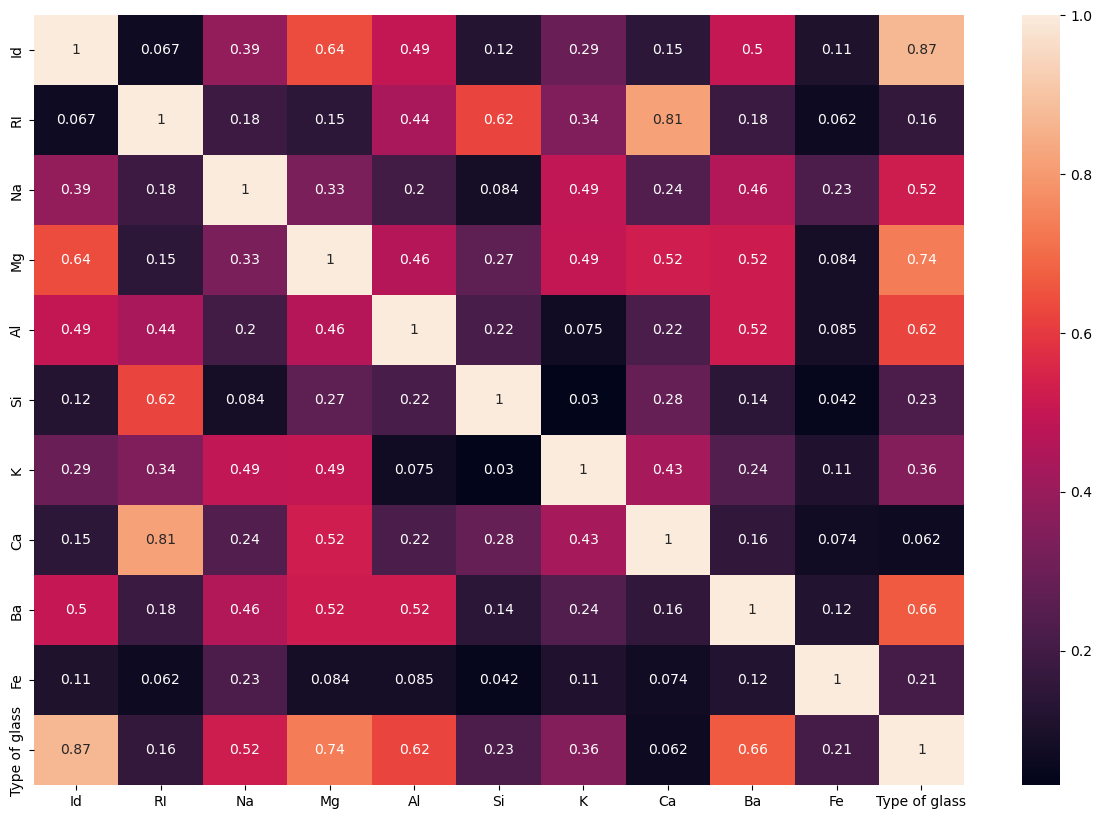

In [13]:
#Use heatmap to check correlation

df_corr = df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot = True,annot_kws={"size" : 10 })
plt.show()

In [14]:
X = df.iloc[:,[1,2,4,5,6,7,9]]
y = df['Type of glass']


In [16]:
X

,RI,Na,Al,Si,K,Ca,Fe
0,1.52101,13.64,1.10,71.78,0.06,8.75,0.0
1,1.51761,13.89,1.36,72.73,0.48,7.83,0.0
2,1.51618,13.53,1.54,72.99,0.39,7.78,0.0
3,1.51766,13.21,1.29,72.61,0.57,8.22,0.0
4,1.51742,13.27,1.24,73.08,0.55,8.07,0.0
...,...,...,...,...,...,...,...
208,1.51640,14.37,2.74,72.85,0.00,9.45,0.0
209,1.51623,14.14,2.88,72.61,0.08,9.18,0.0
210,1.51685,14.92,1.99,73.06,0.00,8.40,0.0
211,1.52065,14.36,2.02,73.42,0.00,8.44,0.0


In [17]:
y.value_counts()

Type of glass
2    74
1    70
7    24
3    16
5     9
6     9
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X, y)

In [19]:
y.value_counts()

Type of glass
1    74
2    74
3    74
5    74
6    74
7    74
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
#Train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report


In [45]:
Max_accuracy = 0
Max_random_s = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, train_size = 0.70, random_state = i)
    ETC = ExtraTreesClassifier()
    ETC.fit(x_train,y_train)
    y_pred = ETC.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy>Max_accuracy:
        Max_accuracy = accuracy
        Max_random_s = i
print("Best Accuracy:-",Max_accuracy,"At This Ramdon State:-",Max_random_s)

Best Accuracy:- 0.9626865671641791 At This Ramdon State:- 12


In [47]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, train_size = 0.70, random_state = 12)
ETC = ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_pred = ETC.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9626865671641791
[[24  0  1  0  1  0]
 [ 2 13  1  0  0  0]
 [ 0  0 23  0  0  0]
 [ 0  0  0 22  0  0]
 [ 0  0  0  0 26  0]
 [ 0  0  0  0  0 21]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        26
           2       1.00      0.81      0.90        16
           3       0.92      1.00      0.96        23
           5       1.00      1.00      1.00        22
           6       0.96      1.00      0.98        26
           7       1.00      1.00      1.00        21

    accuracy                           0.96       134
   macro avg       0.97      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134



In [48]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(ETC,X_scaled,y)

In [49]:
print(cv_score)
print(cv_score.mean())

[0.91011236 0.86516854 0.83146067 0.84269663 0.86363636]
0.8626149131767109


In [53]:
from sklearn.model_selection import GridSearchCV
#FOr model's hyperparameter tuning define some parameters to iterate

grid_parameter = {'criterion':['gini','antropy'],
                  'random_state':[10,50,1000],
                  'max_depth':[0,10,20],
                  'n_jobs': [-2,-1,1 ],                 
                  'n_estimators':[50,100,200,300]}

In [54]:
GSCV = GridSearchCV(estimator = RFC, param_grid = grid_parameter,cv = 5)

In [55]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'antropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [56]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [57]:
F_ETC = ExtraTreesClassifier(criterion = 'gini',max_depth= 10,n_estimators= 50,n_jobs = -2, random_state = 10)
F_ETC.fit(x_train,y_train)
y_pred = F_ETC.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.9626865671641791
